<img src="https://drive.google.com/thumbnail?id=1cXtXdAcwedVDbapmz1pj_hULsQrhEcff&sz=w1500" width="500"/>

---


# **Generative Adversarial Networks (GANs)**

#### **Morning contents/agenda**

1. Why GANs?

2. Recap of generative models and VAEs

3. Formulation and training strategy

4. Implemention of a simple GAN

5. Pros and cons

6. Overview of main GAN flavours

#### **Learning outcomes**

1. Understand the basic principles of adversarial traning (with two competing networks)

2. Implementa a Generator and a Discriminator and train them with a simple GAN

3. Be aware of the importance of GANs in deep learning, its many variations, benefits, and limitations

<br>

#### **Afternoon not-taught contents/agenda**

1. Conditional GANs

2. Wasserstein GANs theory and implementation example. Materials provided for Wasserstein GAN (for information only, **you will NOT be assessed on WGANs**)

#### **Learning outcomes**

1. Understand how Conditional GANs can be used to generate samples of a specific class

<br/>

---


## 1. Why GANs?

GANs were introduced by Ian Goodfellow and others (including Yoshua Bengio) in 2014.

<center><img src="https://drive.google.com/thumbnail?id=1RPHM4jNVmYwT0_MTttcFnpYAJdjyQ6uC&sz=w1500" width="800"/></center>

<br>

- GANs are very effective as a tool to implicitly learn data distributions.

- They can be used in a wide variety of applications: data generation, clustering, representation learning, translation, etc.

- GANs can handle different types of data: audio, images, video, text, etc.

<br>

There has been very significant improvement from the publication of the [original paper](https://arxiv.org/pdf/1406.2661.pdf). Results in the original publication:

<center><img src="https://drive.google.com/thumbnail?id=1J5IAUvAv0WPp0KjdEersf41hCPI69w8v&sz=w1500" width="600"/></center>

More complex variations on the original idea have resulted in dramatic improvements. For example:

- StyleGAN ([Paper](https://arxiv.org/pdf/1812.04948.pdf))

In [ ]:
%%html
<iframe src="https://thispersondoesnotexist.com/" width="1000" height="1000"></iframe>

<center><img src="https://drive.google.com/thumbnail?id=12fF1vr_SNgc5vUaY0WcA0AC87Tv64Sq5&sz=w1500" width="800"/></center>


<br>

- cycleGAN ([Paper](https://arxiv.org/pdf/1703.10593.pdf))

<center><img src="https://drive.google.com/thumbnail?id=1duze4mADJf-eGH1_15sNqa4bKsibThKu&sz=w1500" width="800"/></center>

<br>


<br>

---

<br>


## 2. Recap of generative models and VAEs

Generative models are designed to find the distribution that better explains where the samples of a particular dataset come from, and then use this distribution to generate data samples.

<br>

<p align = "center"><img src="https://drive.google.com/thumbnail?id=13yVxGyVbefU6on-QFtgS8PHHOM-CnIdE&sz=w1500" width="300"/></p><p align = "center">
<i> <a href="https://openai.com/blog/generative-models/">image source</a></i>
</p>

<br>

but we cannot explicitly know the probability density function that describes $p_{data}(x)$. Instead we use a neural network that we will denote $G$ (Generator) to learn $p_{data}(x)$.

<br>

For a generative network $G$, and given a training real dataset:

- $G$ is a mapping function from $z$ to data space, parameterised by $\theta$ (in VAEs this is our decoder)
- True data distribution $p_{data}(x)$ (<font color='blue'>p(x)</font> in the figure)
- Generated data distribution $p_G(x)$ (<font color='green'>p̂(x)</font> in the figure)



<p align = "center"><img src="https://images.openai.com/blob/1c914c57-32d4-415a-9a2f-53282fd20a32/gen_models_diag_2.svg" width="800"/></p><p align = "center">
<i> <a href="https://openai.com/blog/generative-models/">image source</a></i>
</p>

#### We want to find a generator $G^*$ that satisfies $p_{G^*} \approx p_{data}$



<br>

To find the optimal $G^*$, we update our network parameters to minimise the difference (divergence) between $p_{G}$ and $p_{data}$:

$$G^* = \underset{G}{\operatorname{argmin}}  \text{Div} (p_{data}(x) || p_G(x))$$

But we cannot define a simple loss function to measure this divergence explicitly, because the true distribution $p_{data}(x)$ is our unknown.

As we saw yesterday, VAEs minimise this divergence by maximising the ELBO. It does so through a reconstruction loss (commonly MSE), and by constraining the latent space to a Gaussian distribution, in order to compute the KL divergence.

Recap of training a VAE:

1. Sample $x_i$ from training data.
2. Train an Encoder$(x_i) \rightarrow z_i$ and a Decoder$(z_i) \rightarrow \hat{x}_i$ by using an explicit pixel-wise loss (like MSE).
3. After training is complete, sample $z \approx p(z)$ to generate new data using the decoder.

Consquences of using MSE loss in VAEs:

- Pixel-wise losses are not 'intelligent' enough to account for global patterns
- Blurry (low frequency) outputs

<p align = "center"><img src="https://drive.google.com/thumbnail?id=1-m99v3GlBjhWWI1jZC1x0WR7o7pupYsq&sz=w1500" width="600"/></p><p align = "center">
<i> which image is perceptually better? </a></i>
</p>

<br>

Later today we will implement a simple GAN and confirm that it produces sharper images than the VAE we implemented yesterday:

<br>

<p align = "center"><img src="https://drive.google.com/thumbnail?id=1GY4bhQ01eEWGZdx_9oqR0tk7hs_JUGo6&sz=w1500" width="400"/></p><p align = "center">
<i> VAE results on MNIST </a></i>
</p>

<br>

<p align = "center"><img src="https://drive.google.com/thumbnail?id=1fXftd0wG_wKAooG_EZUTmXGhnuGc8L53&sz=w1500" width="400"/></p><p align = "center">
<i> GAN results on MNIST </a></i>
</p>

<br>


### **Adversarial loss** for the generative model:
GANs provide a method to directly optimise $G^* = \underset{G}{\operatorname{argmin}} \, \text{Div} (P_{data}(x) \, || \, P_G(x))$ by using another network called a **Discriminator** for the loss function – the **adversarial loss**.


Training GAN $\rightarrow$ minimising Jensen-Shannon divergence (but other divergences/distances can also be used)

The advantages of GANs compared to VAEs are:

- Loss function used is more 'flexible' and 'intelligent'.
- It produces perceptually better results than VAEs' MSE loss.


<p align = "center">
<img src="https://drive.google.com/thumbnail?id=1WhWQS-co1CB4_60zQfr-vxfYWx05vgnh&sz=w1500" width="1000"/>
</p>

<br>

---

<br>


## 3. Formulation and training strategy


<center><img src="https://drive.google.com/thumbnail?id=166bm5GMoWPS5kQxA4Pt3LOk1mqf73FkS&sz=w1500" width="800"/></center>

<br>

To generate realistic samples from $G(z)$, we play a zero-sum competition game:

- Train $D$ to **correctly label** its inputs as *REAL* or *FAKE*

- Train $G$ to **'fool'** $D$ to label $G(z)$ as a *REAL* sample

In this way, both Generator and Discriminator improve as the training workflow progresses: $G$ gets better at generating *FAKE* samples, because $D$ is getting better at spotting them. The optimal solution would be met when:

$$


{G: p_G = p_{data}}

$$

<br>

To play this zero-sum game, we use a **min-max loss function**:

<br>

$$

\boxed {\underset{G}{\operatorname{min}} \underset{D}{\operatorname{max}}  V_{GAN} (G,D) = \mathbb{E}_{x \sim p_{data}(x)} [\log D(x)]
+ \mathbb{E}_{z \sim p_{z}(z)} [\log(1 - D(G(z)))]}

$$

<br>

The equation itself computes the expected value of the discriminator labelling real samples as real and fake samples as fake. And we train it in two parts:

1. Train $D$ to maximise the loss, so that:
  - when input is *REAL*: $\, \, D(x) \rightarrow 1$
  - when input is *FAKE*: $\, \, D(G(z)) \rightarrow 0$

2. Train $G$ to minimise the loss:
  - 'Fools' $D$ to output a high-score when when input is *FAKE*: $\, \, D(G(z)) \rightarrow 1$


So, when we train GANs we following this workflow:

<br>

<center><img src="https://drive.google.com/thumbnail?id=1om1rv0un8TWKifoo35iiu_ukphLsQ138&sz=w1500" width="800"/></center>

<br>


A visual representation of the training process (image adapted from the [original paper](https://arxiv.org/pdf/1406.2661.pdf)):

<br>

<center><img src="https://drive.google.com/thumbnail?id=1ZmEJOigye_0hb9_PdHla-52-x_uYYEW-&sz=w1500" width="800"/></center>

<br>

As we mentioned above, we are playing a zero-sum game. But what does this means? A zero-sum game is a mathematical representation of a situation involving two players (or more) where the gains of one player equal the losses of the other. In the context of GANs, it means that if the Generator gets better, by definition, the Discriminator must get worse. That does not mean that both of them can't get better if we train them in an alternate way, which is exactly what we do in GANs.

When we have a look at the loss curves for a GANs, we should see this kind of behaviour:

<br>

<center><img src="https://drive.google.com/thumbnail?id=1IbN8wG8KdELj6aCtkh1UqGNpZ6TGPAXR&sz=w1500" width="400"/></center>

<br>


The optimal discriminator $D^*$ is obtained by maximising the adversarial loss:

$$
D^*(x) = {\underset{D}{\operatorname{argmax}}} \left[ p_{data}(x) \log{D(x)} + p_G(x) \log{(1-D(x))} \right]
$$

And by setting the derivative of the objective function with respect to $D(x)$ to zero, this is equivalent to:


$$
D^*(x) = \frac{p_{ data}(x) }{ p_{data}(x) + p_G(x) }
$$


Substituting this into the loss expression and noting that $1 - D^*(x) = \frac{p_{G}(x) }{ p_{data}(x) + p_G(x) }$ gives us:

<br>

$$
V_{GAN} (G,D^*) = \mathbb{E}_{x \sim p_{data}(x)} \left[\frac{p_{data}(x) }{ p_{data}(x) + p_G(x) }  \right] + \mathbb{E}_{x \sim p_G} \left[\frac{p_G(x)}{ p_{data}(x) + p_G(x) }  \right] \\[20pt] = - \log(4) + 2 JSD (p_{data} || p_G)
$$

where JSD is the [Jensen-Shannon Divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence) between $p_{data}$ and $p_G$ \[you can find the full derivation in the original paper by Goodfellow\].

This means that, for an optimal $D^*(x)$, training the generator is equal to minimising the JS divergence.

<br>

<br>




### **Intuitive explanation of GANs training procedure**:

We can interpret GANs as a competition between a ***Forger*** ($G$) and a ***Detective*** ($D$):

<br>

<center><img src="https://miro.medium.com/max/1400/1*-gFsbymY9oJUQJ-A3GTfeg.webp" width="800"/> <br> <a href="https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f"> <i> image source </i>  </a> </center>

<br>



But it is better to thing of it in terms of a ***teacher*** ($D$) and a ***student*** ($G$). Interaction between $G$ and $D$:

1. $D$ is leading $G$:
  - $D$ is trained first
  - $D$ provides knowledge to update $G$

2. $D$ needs to teach adapting to the level of $G$:
  - Measure the distance between current $p_G$ and $p_{data}$

<br>

<center><img src="https://drive.google.com/thumbnail?id=1_VwpWfWZlr-ijrK3wUKNOFEO3nwuWb3t&sz=w1500" width="800"/> <br> <a href="https://robots.media.mit.edu/wp-content/uploads/sites/7/2021/03/EAAI-What-are-GANs_.pdf"> <i> image source </i> </a> </center>

<br>




In [ ]:
%%html
<iframe src="https://poloclub.github.io/ganlab/" width="1200" height="600"></iframe>

<br>

---
---

<br>

## 4. Implementation of a simple GAN on MNIST

We will implement a very similar architecture to that of the original paper.

A few imports before we get started

In [ ]:
!pip install livelossplot -q
%pylab inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

from livelossplot import PlotLosses

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

import random
def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = False

    return True

device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Populating the interactive namespace from numpy and matplotlib
Cuda installed! Running on GPU!


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['Generator', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### **Dataset & Dataloader**

In [ ]:
batch_size = 64

# MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))]) # The original implementation of GANs scales the data
                                                  # between [-1, 1]. We do that through the normalise transform.
                                                  # Removing 0.5 from the data scales the data from [0, 1] to [-0.5, 0.5]
                                                  # Dividing it by 0.5 scales the data from [-0.5, 0.5] to [-1, 1]

train_dataset = MNIST(root='./mnist_data/', train=True, transform=transform, download=True)

# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

#### Question:
We are not splitting the data now, why? What does **generalisation** mean here?


### **Model and Optimiser**



- The Generater network ($G$) maps the latent vector back to the data space and consists of 4 Linear layers;
- the Discriminator network ($D$) is a classifier and also consists of 4 Linear layers.
- Latent vector length: 100

Network $G$:
1. Layer 1: 100 $\rightarrow$ 256 (100 is length of latent vector)
2. Layer 2: 256 $\rightarrow$ 512
3. Layer 3: 512 $\rightarrow$ 1024
4. Layer 4: 1024 $\rightarrow$ 784 (size of a MNIST image)

Apply [`LeakyReLU`](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html) with (negative_slope=0.2) activation functions for  layers $1 → 3$

<br>

<img src="https://pytorch.org/docs/stable/_images/LeakyReLU.png" width="400"/>

<br>


`LeakyReLU` is one of the adaptations of ReLU that helps to mitigate the vanishing gradient problem. **Why?**

<br>

Network $D$:
1. Layer 1: 784 $\rightarrow$ 1024
2. Layer 2: 1024 $\rightarrow$ 512
3. Layer 3: 512 $\rightarrow$ 256
3. Layer 4: 256 $\rightarrow$ 1

Apply ``LeakyReLU(negative_slope=0.2)`` activation functions for layers $1 → 3$. Can also apply low rate ``Dropout(0.3)`` for  layers $1 → 3$.


*Note that, although here we have used the Linear layers, it is equally possible, and often preferred for image data, to use Convolutional layers.*

In [ ]:
class Generator(nn.Module):
    def __init__(self, g_input_dim, g_output_dim):
        super().__init__()
        self.fc1 = nn.Linear(g_input_dim, 256)
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features*2)
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features*2)
        self.fc4 = nn.Linear(self.fc3.out_features, g_output_dim)
        self.activation = nn.LeakyReLU(0.2)

    # forward method
    def forward(self, z):
        x = self.activation(self.fc1(z))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        return torch.tanh(self.fc4(x)) # Our input is in the range [-1, 1]

class Discriminator(nn.Module):
    def __init__(self, d_input_dim):
        super().__init__()
        self.fc1 = nn.Linear(d_input_dim, 1024)
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features//2)
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features//2)
        self.fc4 = nn.Linear(self.fc3.out_features, 1)
        self.activation = nn.LeakyReLU(0.2)
        self.dropout = nn.Dropout(0.3) # We regularise the discriminator by adding dropout so it doesn't memorise
                                       # the training data

    # forward method
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        x = self.activation(self.fc3(x))
        x = self.dropout(x)
        return torch.sigmoid(self.fc4(x)) # Our discriminator is a binary classifier with probability between [0, 1]


# Instantiate model and send to device
z_dim = 128
x_dim = 28*28
G = Generator(z_dim, x_dim).to(device)
D = Discriminator(x_dim).to(device)

G(torch.randn(10, z_dim).to(device)).shape, D(torch.randn(10, x_dim).to(device)).shape

(torch.Size([10, 784]), torch.Size([10, 1]))

Print $G$ and $D$

In [ ]:
G

Generator(
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=784, bias=True)
  (activation): LeakyReLU(negative_slope=0.2)
)

In [ ]:
D

Discriminator(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=1, bias=True)
  (activation): LeakyReLU(negative_slope=0.2)
  (dropout): Dropout(p=0.3, inplace=False)
)

Optimiser Hyper-parameters:
- Learning_rate: 2$e^{-4}$
- Optimiser: Adam

*Note that it is possible to have different optimiser hyperparameters for the generator and discriminator*

In [ ]:
lr = 0.0002
G_optimiser = torch.optim.Adam(G.parameters(), lr=lr)
D_optimiser = torch.optim.Adam(D.parameters(), lr=lr)

### **Training Functions**

We need two training functions: one to train the discriminator, another to train the generator. Let's define them:

In [ ]:
def D_train(x):
    #-------------- Function of the discriminator training -------------------#
    D.train(), G.eval()
    D_optimiser.zero_grad()

    bs = x.shape[0]

    # Real data reshaped -- label for all real samples is 1
    x_real, y_real = x.view(-1, 28*28), torch.ones(bs, 1)
    x_real, y_real = x_real.to(device), y_real.to(device)

    # Training loss for real data
    D_output = D(x_real)
    D_real_loss = criterion(D_output, y_real)

    # Sample vector and generation of fake data -- label for all fake samples is 0
    z = torch.randn(bs, z_dim).to(device)
    x_fake, y_fake = G(z), torch.zeros(bs, 1).to(device)

    # Training loss for fake data
    D_output = D(x_fake.detach())
    D_fake_loss = criterion(D_output, y_fake)

    # Combine the losses
    D_loss = D_real_loss + D_fake_loss

    # Backpropagate and model update
    D_loss.backward()
    D_optimiser.step()

    return D_loss.item()

and for $G$:

In [ ]:
def G_train(x):
    #-------------- Function of the generator training -------------------#
    G.train()
    G_optimiser.zero_grad()

    bs = x.shape[0]

    # Sample vector and generation of fake data
    z = torch.randn(bs, z_dim).to(device)
    x_fake = G(z)

    # To "fool" the discriminator, fake data labels are set to 1
    y = torch.ones(bs, 1).to(device)

    # Training loss of the generator
    D_output = D(x_fake)
    G_loss = criterion(D_output, y)

    # Backpropagate and model update
    G_loss.backward()
    G_optimiser.step()

    return G_loss.item()

**Which Loss Function?**

In [ ]:
criterion = nn.BCELoss() # Training is driven by the discriminator, which is a binary classifier

And loop over epochs to train:

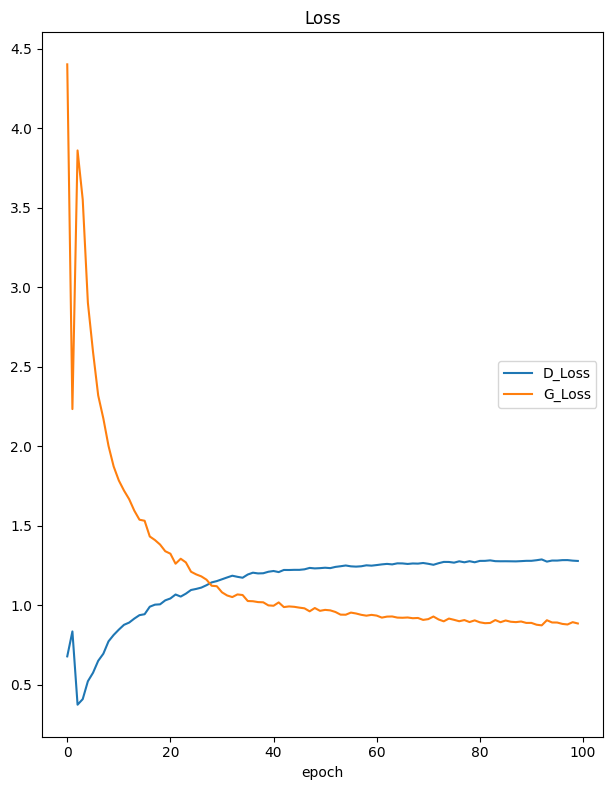

Loss
	D_Loss           	 (min:    0.374, max:    1.288, cur:    1.279)
	G_Loss           	 (min:    0.873, max:    4.402, cur:    0.885)


In [ ]:
n_epoch = 100
groups = {'Loss': ['D_Loss', 'G_Loss']}
liveloss = PlotLosses(groups=groups)

for epoch in range(1, n_epoch+1):
    d_loss_epoch, g_loss_epoch = 0, 0
    logs = {}

    # Loop through batch and train discriminator then generator
    for batch_idx, (x, _) in enumerate(train_loader):
        d_loss_epoch += D_train(x) # Train discriminator
        g_loss_epoch += G_train(x) # Train generator

    # Update logs
    logs['D_Loss'] = d_loss_epoch / len(train_loader)
    logs['G_Loss'] = g_loss_epoch / len(train_loader)
    liveloss.update(logs)
    liveloss.draw()

    # Save every 20th epochs
    if(np.mod(epoch, 20) == 0):
        torch.save(G.state_dict(), "./Generator_{:03d}.pth".format(epoch))

---
---

### **Generating new images from a the Generator**

In [ ]:
from torchvision.utils import make_grid

def generate(G, z_dim, N=64, nrow=8, seed=0, plot=True):
    G.eval()
    set_seed(seed)
    with torch.no_grad():
        z = torch.randn(N, z_dim).to(device)
        generated = G(z).view(-1, 1, 28, 28)

    # Plot images
    if plot:
        grid = make_grid(generated, nrow=nrow, padding=2)
        fig = plt.figure(figsize=(10,10))
        plt.imshow(grid[0].cpu().numpy(), cmap="gray")
        plt.show()

    return generated



Downloading...
From: https://drive.google.com/uc?id=1pZwDD8poDWNrqpSJOQGa4IzSHLDtNnGu
To: /content/Generator_100.pth
100% 5.98M/5.98M [00:00<00:00, 211MB/s]


<ipython-input-28-22e0c02dedb8>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  G.load_state_dict(torch.load("./Generator_100.pth"))


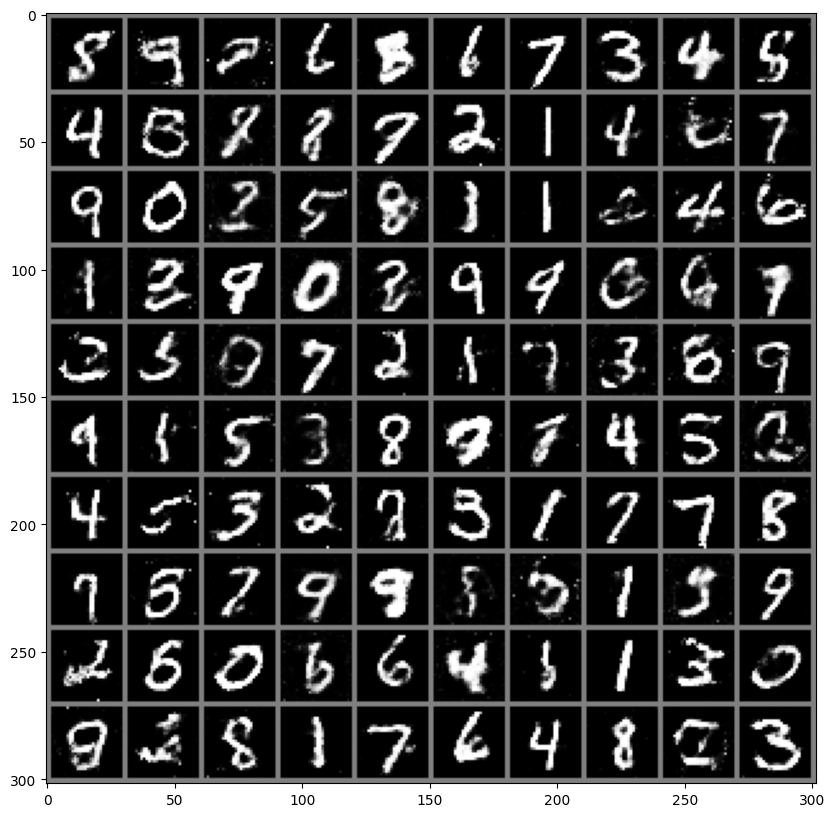

In [ ]:
# Download trained model's state dict
!gdown 1pZwDD8poDWNrqpSJOQGa4IzSHLDtNnGu

# Load state dict to G
G.load_state_dict(torch.load("./Generator_100.pth"))

# Generate and plot images
_ = generate(G, z_dim, N=100, nrow=10, seed=0, plot=True)


Compare against **VAE** result (using a VAE network with similar complexity):

<br>

<img src="https://drive.google.com/thumbnail?id=1GY4bhQ01eEWGZdx_9oqR0tk7hs_JUGo6&sz=w1500" width="800"/> <i> <br>VAE result </i>

<br>


<br>

---

<br>

## 5. Advantages and Disadvantages of GANs

- <font color='green'>$\checkmark$</font> GANs are an evolution of VAEs which produce **“sharper” and more “perceptually realistic” results** by using a neural network to produce samples indistinguishable from the training data

- <font color='green'>$\checkmark$</font>GANs implicitly model the data distribution **without explicitly requiring a probabilistic formulation or assumptions about the true data's distribution**, making them more flexible in capturing more complex distributions

- <font color='green'>$\checkmark$</font> Like VAEs, GANs are **one-shot samplers**, circumventing the need for costly Markov chains for iterative refinements.

<br>

- <font color='red'>$\times$</font> GANs require a fine balancing of both networks to successfully train. If the discriminator becomes too strong, the generator may receive vanishing gradients, slowing or halting its learning. Conversely, if the generator outpaces the discriminator, the discriminator provides useless gradients. GANs are **notoriously unstable and difficult to train**.

- <font color='red'>$\times$</font> Following this instability, GANs are particularly **sensitive to the choice of hyperparameters** (learning rate, batch size, optimisers, etc.)

- <font color='red'>$\times$</font> GANs implicit learning of the data's distribution means they are **hard to interpret**.

- <font color='red'>$\times$</font> GANs are prone to *mode collapse*, which occurs when the **generator learns to produce limited diversity** in its output that successfully fool the discriminator

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*iYSy1UlFtGcpWRFquJiqPA.png" width="800"/> <i><br>[source](https://medium.com/@miraytopal/what-is-mode-collapse-in-gans-d3428a7bd9b8) </i>


<img src="https://www.researchgate.net/publication/385921282/figure/fig1/AS:11431281291249435@1731988036180/Mode-collapse-behavior-target-distribution-plain-dots-and-G-t-Z-cross-dots.ppm" width="800"/> <i><br>[source](https://www.researchgate.net/publication/385921282_Parallelly_Tempered_Generative_Adversarial_Networks)</i>

<br>

## 6. Other GAN flavours

So far in this notebook we have implemented and discussed the original architecture of GANs proposed by Goodfellow, 2014. This is referred in the field as the **Vanilla GAN** implementation.

Vanilla GANs and its adversarial formulation serve as the foundation for many subsequent GAN architectures.

In particular, due to the limitations we discussed above, several variations and improvements from Vanilla GAN focus on improving the stability and convergence of these networks.

#### [**Wasserstein GAN**](https://arxiv.org/abs/1701.07875) (today's extra materials)
- Replaces the traditional discriminator loss function with a **Wasserstein loss**, which provides a **smoother gradient and avoids issues with vanishing gradients**.
- Introduces **weight clipping in the discriminator** to ensure the model satisfies the Lipschitz continuity required for the Wasserstein distance.
- Uses a continuous and more interpretable metric (Wasserstein distance) to measure how closely the generated data matches the real data distribution

<figure>
<center>
<img src='https://www.researchgate.net/profile/Soheil-Kolouri-2/publication/324246144/figure/fig6/AS:612260317777920@1522985643291/These-plots-show-W-1-p-q-t-and-JSp-q-t-where-p-is-a-uniform-distribution-around.png' />
<figcaption>These plots show W-distance and J-S divergence where p is a uniform distribution around zero and q τ (x) = p(x − τ). It is clear that JS divergence does not provide a usable gradient when distributions are supported on non-overlapping domains. (Kolouri et al, 2018)</figcaption></center>
</figure>

#### [**DCGANs**](https://arxiv.org/abs/1511.06434)

- Replaces fully connected layers with convolutional layers in both the generator and discriminator.

- Uses batch normalisation to stabilise training.

<img src="https://user-images.githubusercontent.com/37034031/43060428-dd0b2b88-8e8b-11e8-9f50-e199e1ea22ee.png" width="800"/> <i><br>Generated MNIST images with DCGAN [source](https://github.com/ChengBinJin/DCGAN-TensorFlow)</i>


<br>

#### [**Conditional GANs**](https://arxiv.org/abs/1411.1784) (today's not taught excercise)

- Incorporates conditional information (e.g., class labels, textual descriptions) into both the generator and discriminator (Mirza and Osindero, 2014) for guided synthetsis

<figure>
<center>
<img src='https://www.machinelearningmastery.com/wp-content/uploads/2019/05/Example-of-100-Generated-items-of-Clothing-using-an-Conditional-GAN.png' />
</center>
</figure>




#### [**StyleGAN**](https://arxiv.org/abs/1812.04948)

- Uses a style-based generator architecture where latent vectors control different levels of detail (e.g., overall structure, fine textures) for controllable image synthesis


<figure>
<center>
<img src='https://editor.analyticsvidhya.com/uploads/89435Screenshot%20(70).png' />
</center>
</figure>

#### [**CycleGAN**](https://arxiv.org/abs/1703.10593)
- Translates images from one domain (A) to another (B) and back, enforcing cycle consistency. This ensures that when an image is translated from domain A $\to$ B $\to$ A, it reconstructs the original image.

<figure>
<center>
<img src='https://junyanz.github.io/CycleGAN/images/teaser.jpg' />
</center>
</figure>

#### [**Progressively Growing GANs**](https://arxiv.org/abs/1710.10196) (
- The generator and discriminator are trained progressively, starting with low-resolution images (e.g., 4 $\times$ 4) and incrementally adding layers to increase the resolution to improve stability

<figure>
<center>
<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*oT8CpImr95iyEZoY6wJTzg.png' />
</center>
</figure>

and countless more....

<br>

---

<br>